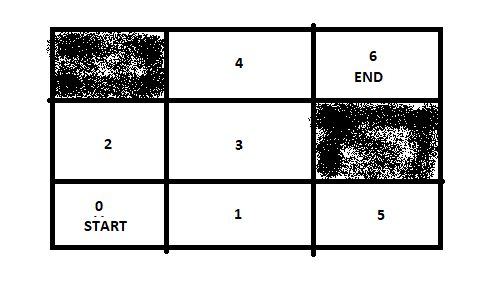

In [29]:
from IPython.core.display import Image, display
display(Image(filename='Maze.png'))

In [30]:
import numpy as np
# R matrix
R = np.matrix([ [-1,100,100,-1,-1,-1,-1],
               [0,-1,-1,100,-1,0,-1],
               [0,-1,-1,100,-1,-1,-1],
               [0,0,0,-1,100,-1,-1],
               [-1,-1,-1,0,-1,-1,100],
               [-1,100,-1,-1,-1,-1,-1],
            [-1,-1,-1,-1,-1,-1,100] ])
print(R)

[[ -1 100 100  -1  -1  -1  -1]
 [  0  -1  -1 100  -1   0  -1]
 [  0  -1  -1 100  -1  -1  -1]
 [  0   0   0  -1 100  -1  -1]
 [ -1  -1  -1   0  -1  -1 100]
 [ -1 100  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1 100]]


In [31]:
# Q matrix
Q = np.matrix (np.zeros([7,7]))
print(Q)
# Gamma (learning parameter)
gamma = 0.8
# Initial state (Usually to be chosen at random)
initial_state = 1

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [32]:
# This function returns all available actions in the state given as # an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
# Get available actions in the current state
available_act = available_actions(initial_state)
# This function chooses at random which action to be performed within the range of all the available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
# Sample next action to be performed
action = sample_next_action(available_act)

In [33]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):  
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]   
    Q[current_state, action] = R[current_state, action] + gamma * max_value
update(initial_state,action,gamma)
print(Q)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [39]:
# Train over 10 000 iterations(Re-iterate the # process above)
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
print(Q)

[[  0. 500. 500.   0.   0.   0.   0.]
 [400.   0.   0. 500.   0. 400.   0.]
 [400.   0.   0. 500.   0.   0.   0.]
 [400. 400. 400.   0. 500.   0.   0.]
 [  0.   0.   0. 400.   0.   0. 500.]
 [  0. 500.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 500.]]


In [40]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0. 100. 100.   0.   0.   0.   0.]
 [ 80.   0.   0. 100.   0.  80.   0.]
 [ 80.   0.   0. 100.   0.   0.   0.]
 [ 80.  80.  80.   0. 100.   0.   0.]
 [  0.   0.   0.  80.   0.   0. 100.]
 [  0. 100.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 100.]]


In [41]:
current_state = 5
steps = [current_state]
#print(steps)
while current_state != 6:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    #print(next_step_index)
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
# Print selected sequence of steps
print("Selected path:")
print(steps)

Selected path:
[5, 1, 3, 4, 6]
